In [1]:
#Dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot, pylab
import scipy.stats as stats
import math


In [2]:
#Read in the data
austin_data = pd.read_csv("../../raw data/Austin_merged_data_with_time_deltas.csv")
louisville_data = pd.read_csv("../../raw data/Louisville_with_time_deltas_dogs_cats_only.csv")

In [3]:
austin_data['Outcome Type'].value_counts()
louisville_data['OutcomeType'].value_counts()

Adoption           24338
Transfer           20462
Return to Owner     9496
Euthanasia          2652
Died                 504
Rto-Adopt             80
Missing               37
Disposal              22
Name: Outcome Type, dtype: int64

EUTH          68280
ADOPTION      24682
TRANSFER      17315
RTO           14136
FOSTER         4507
RELEASED       3460
TNR            3072
DIED           2449
DISPOSAL       1694
TRANSPORT      1661
MISSING        1283
SNR            1085
RTF             551
RELOCATE        107
ET PROCESS       51
NO SHOW          47
MISSING EX       19
RELEASE           8
LOST EXP          5
INDEFINITE        1
Name: OutcomeType, dtype: int64

In [4]:
#Restrict our analysis to adoption, transfer, euthanasia, and death
#Adoption

austin_data=austin_data[austin_data['Outcome Type'].isin(['Adoption','Transfer','Euthanasia','Died'])]
louisville_data=louisville_data[louisville_data['OutcomeType'].isin(['ADOPTION','EUTH','TRANSFER','DIED'])]

austin_data['City']='Austin'
louisville_data['City']='Louisville'

austin_data=austin_data.rename(columns={"Outcome Type":"OutcomeType","Days from Intake to Outcome":"Days between Intake and Outcome"})

In [5]:
df=pd.concat([austin_data,louisville_data]).reset_index()

df['City'].value_counts()

Louisville    112726
Austin         47956
Name: City, dtype: int64

In [6]:
#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='ADOPTION',value='Adoption')
df=df.replace(to_replace='EUTH',value='Euthanasia')
df=df.replace(to_replace='TRANSFER',value='Transfer')
df=df.replace(to_replace='DIED',value='Died')

df['OutcomeType'].value_counts()

Euthanasia    70932
Adoption      49020
Transfer      37777
Died           2953
Name: OutcomeType, dtype: int64

In [7]:
#create lists for boxplot showing intake times for cats vs dogs

adoption=[]
euthanasia=[]
transfer=[]
died=[]

#fill the lists
for row in range(len(df)):    
    if (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Adoption'):
        adoption.append(df.loc[row,'Days between Intake and Outcome'])
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Euthanasia'):
        euthanasia.append(df.loc[row,'Days between Intake and Outcome'])        
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Transfer'):
        transfer.append(df.loc[row,'Days between Intake and Outcome'])                
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Died'):
        died.append(df.loc[row,'Days between Intake and Outcome'])                        
    else:
        continue

In [17]:
%%capture

#set up the figure
data=[adoption, euthanasia, transfer, died]
labels=['Adopted','Euthanized','Transferred','Died']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Outcome Type')
pylab.xlabel("Outcome Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Adopted: 31.134
Euthanized: 8.403
Transferred: 11.792
Died: 17.88

Standard Deviations:
Adopted: 55.158
Euthanized: 17.42
Transferred: 24.686
Died: 64.101

Medians:
Adopted: 14.18
Euthanized: 5.815
Transferred: 5.106
Died: 6.956


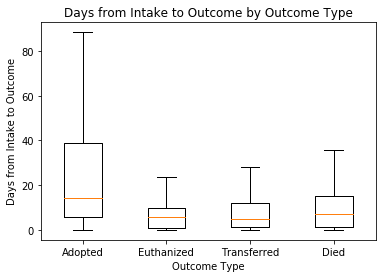

In [18]:
#save box and whiskers plot to PNG file
pyplot.savefig('../figures/time_to_outcome_by_outcome_type.png')

print(f"Mean values:\nAdopted: {round(np.mean(adoption),3)}\nEuthanized: {round(np.mean(euthanasia),3)}\nTransferred: {round(np.mean(transfer),3)}\nDied: {round(np.mean(died),3)}")
print(f"\nStandard Deviations:\nAdopted: {round(np.std(adoption),3)}\nEuthanized: {round(np.std(euthanasia),3)}\nTransferred: {round(np.std(transfer),3)}\nDied: {round(np.std(died),3)}")
print(f"\nMedians:\nAdopted: {round(np.median(adoption),3)}\nEuthanized: {round(np.median(euthanasia),3)}\nTransferred: {round(np.median(transfer),3)}\nDied: {round(np.median(died),3)}")

#show box and whiskers plot
pyplot.show()


In [19]:
#ANOVA:
stats.f_oneway(adoption, euthanasia, transfer, died)

F_onewayResult(statistic=4086.9711082211779, pvalue=0.0)